In [1]:
#A_ch02_104_SVMs.ipynb
#Kernelized Support Vector Machine, SVMs

In [2]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
#建立測試資料 make_blobs()
X,y=sklearn.datasets.make_blobs(centers=4,random_state=8)

In [4]:
y #檢視原y值

array([3, 2, 1, 3, 3, 0, 2, 1, 3, 3, 0, 0, 3, 1, 1, 2, 2, 3, 3, 0, 0, 1, 0,
       0, 3, 0, 0, 3, 2, 1, 1, 3, 1, 3, 0, 2, 3, 0, 1, 2, 1, 3, 2, 2, 0, 2,
       1, 0, 1, 1, 1, 2, 0, 0, 3, 2, 2, 2, 0, 3, 3, 2, 1, 2, 0, 1, 3, 1, 0,
       0, 1, 2, 0, 1, 0, 0, 3, 2, 3, 1, 2, 0, 3, 2, 3, 2, 0, 2, 2, 3, 1, 0,
       3, 2, 2, 1, 1, 3, 1, 1])

In [5]:
#將y值限制在(0,1)
y=y%2

In [6]:
y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
print('X.ndim :',X.ndim,'X.shape :',X.shape)

X.ndim : 2 X.shape : (100, 2)


In [9]:
X[:5]

array([[-1.72161036, -1.48033142],
       [-3.6573384 , -9.5482383 ],
       [ 7.0778163 ,  0.99508772],
       [-1.36579859, -0.3148625 ],
       [-2.66521206, -3.12591651]])

Text(0,0.5,'Feature 1')

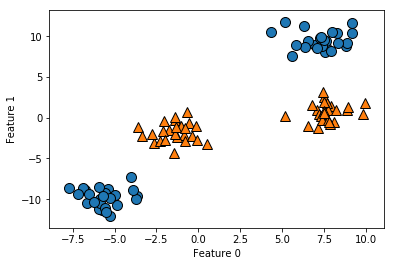

In [11]:
#繪圖檢視測試資料
%matplotlib inline
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [12]:
#上圖，我們用線性模型(一條線)做分類，
#無論如何也無法分得很好

In [13]:
from sklearn.svm import LinearSVC #improt LinearSVC

In [14]:
linear_svm=LinearSVC() #建立 LinearSVC model 'linear_svm'

In [15]:
linear_svm.fit(X,y) #以 X,y fit 模型

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Text(0,0.5,'Feature 1')

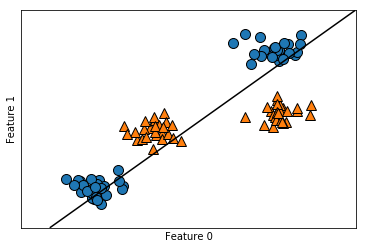

In [16]:
#繪圖檢視訓練後的模型
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [17]:
#無論如何也無法分得很好

In [18]:
#擴充，增加一個輸入特徵--> (feature 1)**2, 特徵二的平方
#令資料成為三維的點 (feature 0, feature 1, feature 1**2)
#而不是二維(feature 0, feature 1)

In [20]:
X_new=np.hstack([X,X[:,1:]**2]) #注意! X[:,1] 與 X[:,1:] 的維度差異

In [23]:
#繪製3D圖檢視資料
import mpl_toolkits

In [24]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

Text(0.5,0,'feature**2')

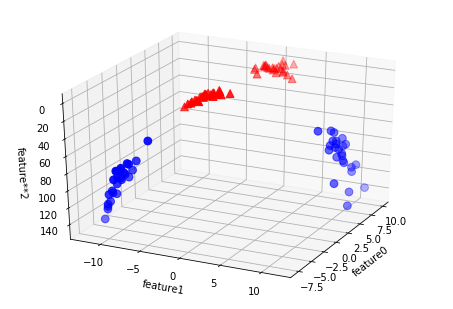

In [26]:
figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
          cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',           
          cmap=mglearn.cm2,s=60)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature**2')

In [27]:
#現在，我們有一個三維的資料，我們重新以 X_new fit model
linear_svm_3d=LinearSVC().fit(X_new,y)

In [28]:
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

Text(0.5,0,'feature1**2')

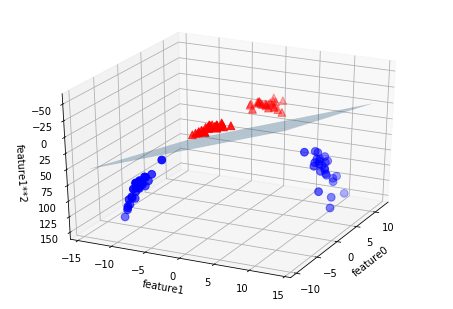

In [30]:
#顯示線性的判定邊界(一個平面)
figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
          cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',
          cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1**2')